# Inducing Variable Demo

### 2021-05-19

$$
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

## Setup

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

<!--setupplotcode{import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set_palette('colorblind')}-->

## pods

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/pods-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/pods-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In Sheffield we created a suite of software tools for ‘Open Data
Science.’ Open data science is an approach to sharing code, models and
data that should make it easier for companies, health professionals and
scientists to gain access to data science techniques.

You can also check this blog post on [Open Data
Science](http://inverseprobability.com/2014/07/01/open-data-science).

The software can be installed using

In [2]:
%pip install --upgrade git+https://github.com/lawrennd/ods

  Cloning https://github.com/lawrennd/ods to /private/var/folders/hc/ybj3wk9922lgf1fgxhw62xjm0000gn/T/pip-req-build-oo8wtn8p
  Running command git clone -q https://github.com/lawrennd/ods /private/var/folders/hc/ybj3wk9922lgf1fgxhw62xjm0000gn/T/pip-req-build-oo8wtn8p
Note: you may need to restart the kernel to use updated packages.


from the command prompt where you can access your python installation.

The code is also available on github: <https://github.com/lawrennd/ods>

Once `pods` is installed, it can be imported in the usual manner.

In [3]:
import pods

## mlai

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/mlai-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/mlai-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The `mlai` software is a suite of helper functions for teaching and
demonstrating machine learning algorithms. It was first used in the
Machine Learning and Adaptive Intelligence course in Sheffield in 2013.

The software can be installed using

In [4]:
%pip install --upgrade git+https://github.com/lawrennd/mlai.git

  Cloning https://github.com/lawrennd/mlai.git to /private/var/folders/hc/ybj3wk9922lgf1fgxhw62xjm0000gn/T/pip-req-build-02kzdxb9
  Running command git clone -q https://github.com/lawrennd/mlai.git /private/var/folders/hc/ybj3wk9922lgf1fgxhw62xjm0000gn/T/pip-req-build-02kzdxb9
Note: you may need to restart the kernel to use updated packages.


from the command prompt where you can access your python installation.

The code is also available on github: <https://github.com/lawrennd/mlai>

Once `mlai` is installed, it can be imported in the usual manner.

In [5]:
import mlai

In [6]:
%pip install gpy

Note: you may need to restart the kernel to use updated packages.


## GPy: A Gaussian Process Framework in Python

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/gpy-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/gpy-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Gaussian processes are a flexible tool for non-parametric analysis with
uncertainty. The GPy software was started in Sheffield to provide a easy
to use interface to GPs. One which allowed the user to focus on the
modelling rather than the mathematics.

<img class="" src="https://inverseprobability.com/gpy-gallery/assets/diagrams//gp/gpy.png" style="width:70%">

Figure: <i>GPy is a BSD licensed software code base for implementing
Gaussian process models in Python. It is designed for teaching and
modelling. We welcome contributions which can be made through the Github
repository <https://github.com/SheffieldML/GPy></i>

GPy is a BSD licensed software code base for implementing Gaussian
process models in python. This allows GPs to be combined with a wide
variety of software libraries.

The software itself is available on
[GitHub](https://github.com/SheffieldML/GPy) and the team welcomes
contributions.

The aim for GPy is to be a probabilistic-style programming language,
i.e. you specify the model rather than the algorithm. As well as a large
range of covariance functions the software allows for non-Gaussian
likelihoods, multivariate outputs, dimensionality reduction and
approximations for larger data sets.

The documentation for GPy can be found
[here](https://gpy.readthedocs.io/en/latest/).

## A Simple Regression Problem

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/inducing-variables-demo.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/inducing-variables-demo.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Here we set up a simple one dimensional regression problem. The input
locations, $\mathbf{X}$, are in two separate clusters. The response
variable, $\mathbf{ y}$, is sampled from a Gaussian process with an
exponentiated quadratic covariance.

In [7]:
import numpy as np
import GPy

In [8]:
np.random.seed(101)

In [9]:
N = 50
noise_var = 0.01
X = np.zeros((50, 1))
X[:25, :] = np.linspace(0,3,25)[:,None] # First cluster of inputs/covariates
X[25:, :] = np.linspace(7,10,25)[:,None] # Second cluster of inputs/covariates

# Sample response variables from a Gaussian process with exponentiated quadratic covariance.
k = GPy.kern.RBF(1)
y = np.random.multivariate_normal(np.zeros(N),k.K(X)+np.eye(N)*np.sqrt(noise_var)).reshape(-1,1)

First we perform a full Gaussian process regression on the data. We
create a GP model, `m_full`, and fit it to the data, plotting the
resulting fit.

In [10]:
m_full = GPy.models.GPRegression(X,y)
_ = m_full.optimize(messages=True) # Optimize parameters of covariance function

In [11]:
import matplotlib.pyplot as plt
import mlai
import mlai.plot as plot 
from mlai.gp_tutorial import gpplot

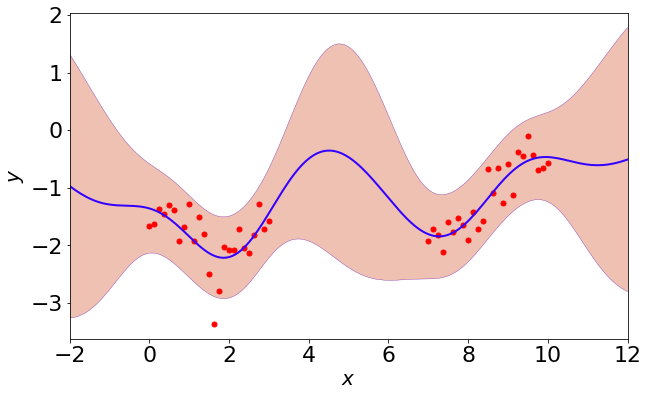

In [12]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
mlai.write_figure(figure=fig,
                  filename='sparse-demo-full-gp.svg',
                  directory='./gp/')

<img src="https://inverseprobability.com/gpy-gallery/assets/diagrams//gp/sparse-demo-full-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Full Gaussian process fitted to the data set.</i>

Now we set up the inducing variables, $\mathbf{u}$. Each inducing
variable has its own associated input index, $\mathbf{Z}$, which lives
in the same space as $\mathbf{X}$. Here we are using the true covariance
function parameters to generate the fit.

In [13]:
kern = GPy.kern.RBF(1)
Z = np.hstack(
        (np.linspace(2.5,4.,3),
        np.linspace(7,8.5,3)))[:,None]
m = GPy.models.SparseGPRegression(X,y,kernel=kern,Z=Z)
m.noise_var = noise_var
m.inducing_inputs.constrain_fixed()
display(m)

sparse_gp.,value,constraints,priors
inducing inputs,"(6, 1)",fixed,
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


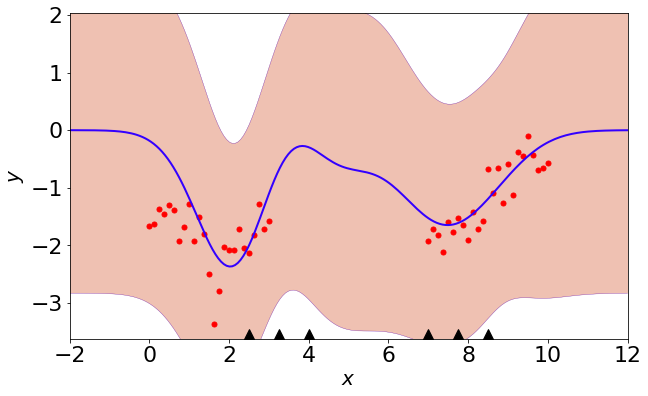

In [14]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2, xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='sparse-demo-constrained-inducing-6-unlearned-gp.svg', 
                  directory='./gp/')

<img src="https://inverseprobability.com/gpy-gallery/assets/diagrams//gp/sparse-demo-constrained-inducing-6-unlearned-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Sparse Gaussian process fitted with six inducing variables,
no optimization of parameters or inducing variables.</i>

In [15]:
_ = m.optimize(messages=True)
display(m)

sparse_gp.,value,constraints,priors
inducing inputs,"(6, 1)",fixed,
rbf.variance,2.2954561330013297,+ve,
rbf.lengthscale,5.024329852178819,+ve,
Gaussian_noise.variance,0.16188727666454197,+ve,


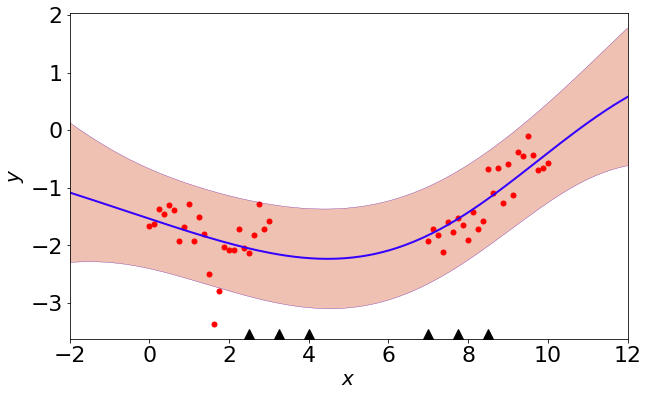

In [16]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2, xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='sparse-demo-constrained-inducing-6-learned-gp.svg',
                  directory='./gp/')

<img src="https://inverseprobability.com/gpy-gallery/assets/diagrams//gp/sparse-demo-constrained-inducing-6-learned-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Gaussian process fitted with inducing variables fixed and
parameters optimized</i>

In [17]:
m.randomize()
m.inducing_inputs.unconstrain()
_ = m.optimize(messages=True)

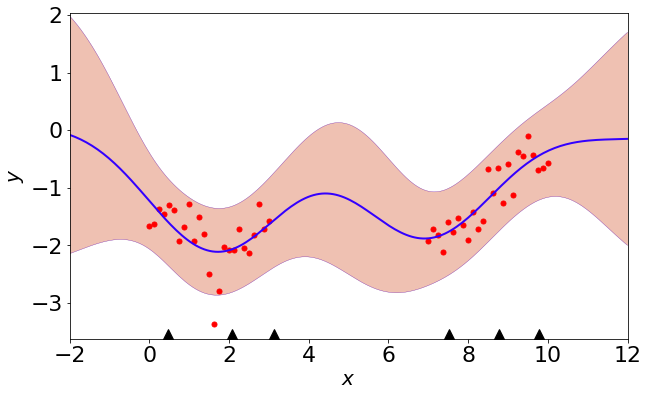

In [18]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2,xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='sparse-demo-unconstrained-inducing-6-gp.svg', 
                  directory='./gp/')

<img src="https://inverseprobability.com/gpy-gallery/assets/diagrams//gp/sparse-demo-unconstrained-inducing-6-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Gaussian process fitted with location of inducing variables
and parameters both optimized</i>

Now we will vary the number of inducing points used to form the
approximation.

In [19]:
m.num_inducing=8
m.randomize()
M = 8
m.set_Z(np.random.rand(M,1)*12)

_ = m.optimize(messages=True)

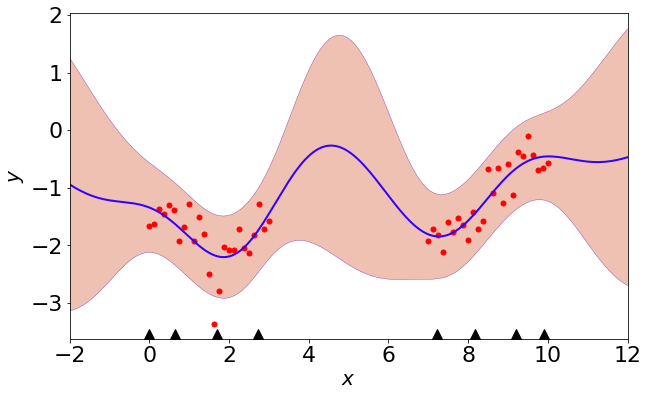

In [20]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, ax=ax, xlabel='$x$', ylabel='$y$', fontsize=20, portion=0.2, xlim=xlim, ylim=ylim)
mlai.write_figure(figure=fig,
                  filename='sparse-demo-sparse-inducing-8-gp.svg', 
                  directory='./gp/')

<img src="https://inverseprobability.com/gpy-gallery/assets/diagrams//gp/sparse-demo-sparse-inducing-8-gp.svg" class="" width="80%" style="vertical-align:middle;">
<img src="https://inverseprobability.com/gpy-gallery/assets/diagrams//gp/sparse-demo-full-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Comparison of the full Gaussian process fit with a sparse
Gaussian process using eight inducing varibles. Both inducing variables
and parameters are optimized.</i>

And we can compare the probability of the result to the full model.

In [21]:
print(m.log_likelihood(), m_full.log_likelihood())

[[-29.86773324]] -29.82775289442023


## References